# Missing Data Analysis

### Packages importations

In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Data first discovery

In [59]:
data = pd.read_csv('all_data_new.csv',low_memory =False)
data.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,temp_max,1,11,14,3,4,7,9,a,b
0,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,9.0,0.0,0.0,0.0,389.0,0.0,0.0,402.0,95.0,0.0
1,767.0,46.4,99.0,54.0,362.0,110.0,auber,18.3,2013-01-15,10:00:00,...,1.0,0.0,0.0,0.0,389.0,0.0,0.0,402.0,95.0,0.0
2,495.0,45.0,68.0,45.0,117.0,36.0,auber,18.7,2013-01-12,10:00:00,...,4.0,0.0,0.0,0.0,389.0,0.0,0.0,402.0,95.0,0.0
3,708.0,45.3,90.0,40.0,234.0,73.0,auber,19.5,2013-01-09,10:00:00,...,6.0,0.0,0.0,0.0,389.0,0.0,0.0,402.0,95.0,0.0
4,749.0,41.8,213.0,62.0,314.0,112.0,auber,17.5,2013-01-16,10:00:00,...,1.0,0.0,0.0,0.0,389.0,0.0,0.0,402.0,95.0,0.0


#### Date & Time processing

In [60]:
data['year'],data['month'],data['day'] = data["date"].str.split("-").str
data['year'] = data['year'].astype(int)
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)

In [61]:
data['hour'],data['minute'],data['second'] = data["time"].str.split(":").str
data['hour'] = data['hour'].astype(int)
data['minute'] = data['minute'].astype(int)
data['second'] = data['second'].astype(int)

In [62]:
data = data.drop(labels = ['minute','second'], axis = 1)

In [63]:
data['date'] = pd.to_datetime(data['date'], format = "%Y-%m-%d")

In [64]:
data['weekday'] = data['date'].dt.dayofweek

In [65]:
data['time'] = pd.to_datetime(data['time'], format = "%H:%M:%S")

In [66]:
data['time'] = data["time"].dt.time

In [67]:
data['datetime'] = data['date'].dt.strftime('%Y-%m-%d') + ' ' + data['time'].map(str)
data['datetime'] = pd.to_datetime(data['datetime'], format = "%Y-%m-%d %H:%M:%S")

#### Missing data state

In [68]:
for col in data.columns:
    print("missing data in {} : {} i.e. {}%".format(col,len(data[data[col].isnull()]),
                                                       len(data[data[col].isnull()])/float(len(data)*100)))

missing data in co2 : 6397 i.e. 0.0009128399783098832%
missing data in humi : 3107 i.e. 0.00044336310967778763%
missing data in no : 17234 i.e. 0.0024592596820685523%
missing data in no2 : 8799 i.e. 0.0012556009018522218%
missing data in pm10 : 6162 i.e. 0.0008793059162647336%
missing data in pm2.5 : 38523 i.e. 0.005497160307086389%
missing data in station : 0 i.e. 0.0%
missing data in temp : 3131 i.e. 0.00044678786495048377%
missing data in date : 0 i.e. 0.0%
missing data in time : 0 i.e. 0.0%
missing data in precipitation : 96 i.e. 1.3699021090784554e-05%
missing data in temp_min : 96 i.e. 1.3699021090784554e-05%
missing data in temp_max : 96 i.e. 1.3699021090784554e-05%
missing data in 1 : 0 i.e. 0.0%
missing data in 11 : 0 i.e. 0.0%
missing data in 14 : 0 i.e. 0.0%
missing data in 3 : 0 i.e. 0.0%
missing data in 4 : 0 i.e. 0.0%
missing data in 7 : 0 i.e. 0.0%
missing data in 9 : 0 i.e. 0.0%
missing data in a : 0 i.e. 0.0%
missing data in b : 0 i.e. 0.0%
missing data in year : 0 i.e

Les colonnes possédant le plus de valeurs manquantes : no, pm10, pm2.5,co2  
WARNING no missing data in timetable, stations ect... because I(romain) generated the data

In [69]:
print(len(data[data["co2"].isnull() & 
                        data["humi"].isnull() &
                        data["no"].isnull() & 
                        data["no2"].isnull() &
                        data["pm10"].isnull() & 
                        data["pm2.5"].isnull() & 
                        data["no2"].isnull() & 
                       data["temp"].isnull()]))

3070


For 3070 raws, data is missing for almost all sensors (except rain) -> remove all these rows

### Missing data arrays

In [70]:
missing_data = data[data["co2"].isnull() | 
                        data["humi"].isnull() |
                        data["no"].isnull() | 
                        data["no2"].isnull() |
                        data["pm10"].isnull() | 
                        data["pm2.5"].isnull() |
                       data["temp"].isnull()]
missing_data.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,7,9,a,b,year,month,day,hour,weekday,datetime
0,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,0.0,402.0,95.0,0.0,2013,1,1,10,1,2013-01-01 10:00:00
5,NaN,44.2,235.0,48.0,654.0,254.0,auber,17.8,2013-01-17,10:00:00,...,0.0,402.0,95.0,0.0,2013,1,17,10,3,2013-01-17 10:00:00
8,590.0,52.2,NaN,NaN,911.0,374.0,auber,21.6,2013-01-04,10:00:00,...,0.0,402.0,95.0,0.0,2013,1,4,10,4,2013-01-04 10:00:00
16,616.0,48.2,NaN,NaN,857.0,306.0,auber,20.4,2013-01-02,10:00:00,...,0.0,402.0,95.0,0.0,2013,1,2,10,2,2013-01-02 10:00:00
19,663.0,52.6,NaN,NaN,633.0,247.0,auber,21.0,2013-01-03,10:00:00,...,0.0,402.0,95.0,0.0,2013,1,3,10,3,2013-01-03 10:00:00


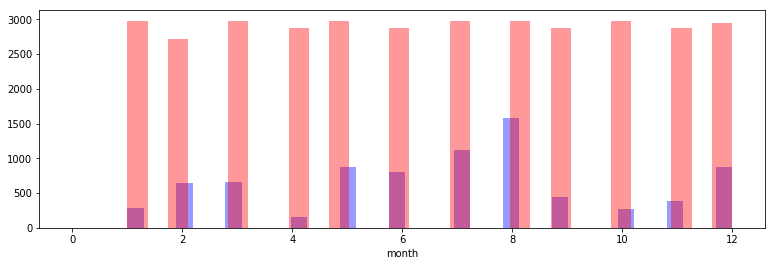

In [71]:
fig, ax = plt.subplots(figsize=(13,4))
sns.distplot(missing_data[missing_data['station'] == 'auber']['month'], ax = ax, kde = False, color='blue')
sns.distplot(missing_data[missing_data['station'] == 'chatelet']['month'], ax = ax, kde = False, color='red')
sns.distplot(missing_data[missing_data['station'] == 'franklin']['month'], ax = ax, kde = False, color='green')



Discrepancies in missing data between the stations. Seems like Chatelet station is lacking a lot of data. 

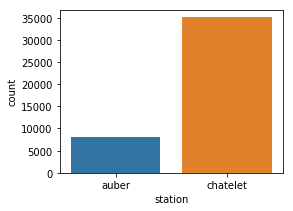

In [72]:
fig, ax = plt.subplots(figsize=(4,3))
ax = sns.countplot(ax=ax,data = missing_data,x="station")

In [73]:
data_2013 = data[data['date'] < "2013-12-31"]

In [74]:
missing_data_2013 = missing_data[missing_data['date'] < "2014-01-01"]
missing_data_2014 = missing_data[missing_data['date'] < "2015-01-01"]
missing_data_2014 = missing_data_2014[missing_data_2014['date'] > "2013-12-31"]
missing_data_2015 = missing_data[missing_data['date'] < "2016-01-01"]
missing_data_2015 = missing_data_2015[missing_data_2015['date'] > "2014-12-31"]
missing_data_2016 = missing_data[missing_data['date'] < "2017-01-01"]
missing_data_2016 = missing_data_2016[missing_data_2016['date'] > "2015-12-31"]
missing_data_2017 = missing_data[missing_data['date'] < "2018-01-01"]
missing_data_2017 = missing_data_2017[missing_data_2017['date'] > "2016-12-31"]

Text(0.5,1,'2016')

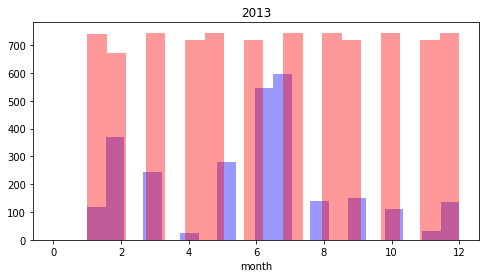

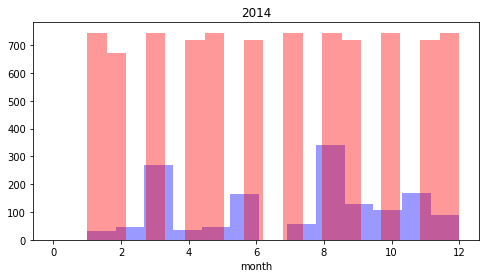

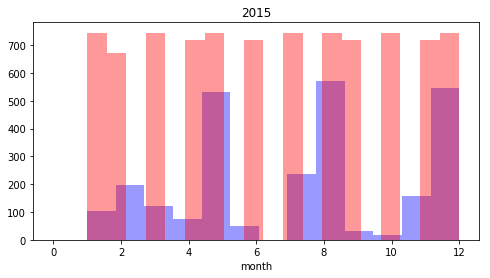

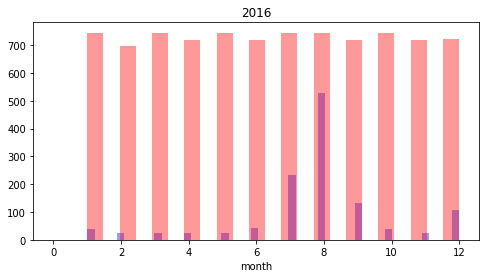

In [75]:

#2013
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(missing_data_2013[missing_data_2013['station'] == 'auber']['month'], ax = ax, kde = False, color='blue', label = 'Auber')
sns.distplot(missing_data_2013[missing_data_2013['station'] == 'chatelet']['month'], ax = ax, kde = False, color='red')
sns.distplot(missing_data_2013[missing_data_2013['station'] == 'franklin']['month'], ax = ax, kde = False, color='green')
plt.title('2013')

#2014
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(missing_data_2014[missing_data_2014['station'] == 'auber']['month'], ax = ax, kde = False, color='blue', label = 'Auber')
sns.distplot(missing_data_2014[missing_data_2014['station'] == 'chatelet']['month'], ax = ax, kde = False, color='red')
sns.distplot(missing_data_2014[missing_data_2014['station'] == 'franklin']['month'], ax = ax, kde = False, color='green')
plt.title('2014')

#2015
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(missing_data_2015[missing_data_2015['station'] == 'auber']['month'], ax = ax, kde = False, color='blue', label = 'Auber')
sns.distplot(missing_data_2015[missing_data_2015['station'] == 'chatelet']['month'], ax = ax, kde = False, color='red')
sns.distplot(missing_data_2015[missing_data_2015['station'] == 'franklin']['month'], ax = ax, kde = False, color='green')
plt.title('2015')

#2016
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(missing_data_2016[missing_data_2016['station'] == 'auber']['month'], ax = ax, kde = False, color='blue', label = 'Auber')
sns.distplot(missing_data_2016[missing_data_2016['station'] == 'chatelet']['month'], ax = ax, kde = False, color='red')
sns.distplot(missing_data_2016[missing_data_2016['station'] == 'franklin']['month'], ax = ax, kde = False, color='green')
plt.title('2016')

Quantité d'informations manquantes similaires d'année en année en moyenne.
Pas de saisonnalité dans les données manquantes de Chatelet et Franklin. 
En revanche, évolution au cours de l'année pour Auber. Cette fois-ci le comportement varie d'une année sur l'autre. Certains années, la majorite des données manquantes apparaît autour des mois de l'été, d'autres années, non. 
Ainsi si l'on met de côté Chatelet et Franklin au vu de l'écart du montant des données manquantes, il ne nous reste qu'Auber. En ne gardant qu'Auber, il est judicieux de ne garder qu'une année en particulier pour faire un modèle car les scénarios sont différents

In [112]:
def valeur(x):
    return [len(data[data[x].isnull() & 
                        data["co2"].isnull()]),len(data[data[x].isnull() & 
                        data["humi"].isnull()]), len(data[data[x].isnull() & 
                        data["no"].isnull()]),len(data[data[x].isnull() & 
                        data["no2"].isnull()]),len(data[data[x].isnull() & 
                        data["pm10"].isnull()]),len(data[data[x].isnull() & 
                        data["pm2.5"].isnull()]),len(data[data[x].isnull() & 
                        data["temp"].isnull()])]
                

d =  {'col1' : valeur('co2'),'col2': valeur('humi'),'col3' : valeur('no'), 
      'col4': valeur ('no2'), 'col5' : valeur('pm10'), 'col6': valeur('pm2.5'), 'col7' : valeur('temp')}


df1= pd.DataFrame(data=d, index = ['missing data co2','missing data humi', 'missing data no', 
             'missing data no2', 'missing data pm10', 'missing data pm2.5', 'missing data temp'])
df1.columns=['missing data co2', 'missing data humi', 'missing data no', 
             'missing data no2', 'missing data pm10', 'missing data pm2.5', 'missing data temp']


df1
                                                   

,missing data co2,missing data humi,missing data no,missing data no2,missing data pm10,missing data pm2.5,missing data temp
missing data co2,6397,3080,4250,3792,3473,4881,3101
missing data humi,3080,3107,3082,3079,3076,3103,3102
missing data no,4250,3082,17234,8799,3825,13989,3104
missing data no2,3792,3079,8799,8799,3379,5986,3101
missing data pm10,3473,3076,3825,3379,6162,5684,3091
missing data pm2.5,4881,3103,13989,5986,5684,38523,3124
missing data temp,3101,3102,3104,3101,3091,3124,3131


Beaucoup de données manquantes en no et pm2.5

### Plage des données manquantes

In [76]:
missing_data_2016_auber = missing_data_2016[missing_data_2016["station"] == "auber"]
missing_data_2016_auber.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,7,9,a,b,year,month,day,hour,weekday,datetime
1053,NaN,NaN,NaN,NaN,NaN,NaN,auber,NaN,2016-07-30,10:00:00,...,0.0,402.0,95.0,0.0,2016,7,30,10,5,2016-07-30 10:00:00
1054,NaN,NaN,NaN,NaN,NaN,NaN,auber,NaN,2016-08-02,10:00:00,...,0.0,402.0,95.0,0.0,2016,8,2,10,1,2016-08-02 10:00:00
1067,NaN,NaN,NaN,NaN,NaN,NaN,auber,NaN,2016-08-10,10:00:00,...,0.0,402.0,95.0,0.0,2016,8,10,10,2,2016-08-10 10:00:00
1068,NaN,NaN,NaN,NaN,NaN,NaN,auber,NaN,2016-08-12,10:00:00,...,0.0,402.0,95.0,0.0,2016,8,12,10,4,2016-08-12 10:00:00
1069,NaN,NaN,NaN,NaN,NaN,NaN,auber,NaN,2016-08-13,10:00:00,...,0.0,402.0,95.0,0.0,2016,8,13,10,5,2016-08-13 10:00:00


Création d'une nouvelle colonne avec une valeur binaire (0, si la donnée est manquante et 1 sinon)

In [77]:
data["missing_co2"]=1
# 1 si donnees
data["missing_co2"][data["co2"].isnull()] = 0

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
data.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,9,a,b,year,month,day,hour,weekday,datetime,missing_co2
0,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,402.0,95.0,0.0,2013,1,1,10,1,2013-01-01 10:00:00,1
1,767.0,46.4,99.0,54.0,362.0,110.0,auber,18.3,2013-01-15,10:00:00,...,402.0,95.0,0.0,2013,1,15,10,1,2013-01-15 10:00:00,1
2,495.0,45.0,68.0,45.0,117.0,36.0,auber,18.7,2013-01-12,10:00:00,...,402.0,95.0,0.0,2013,1,12,10,5,2013-01-12 10:00:00,1
3,708.0,45.3,90.0,40.0,234.0,73.0,auber,19.5,2013-01-09,10:00:00,...,402.0,95.0,0.0,2013,1,9,10,2,2013-01-09 10:00:00,1
4,749.0,41.8,213.0,62.0,314.0,112.0,auber,17.5,2013-01-16,10:00:00,...,402.0,95.0,0.0,2013,1,16,10,2,2013-01-16 10:00:00,1


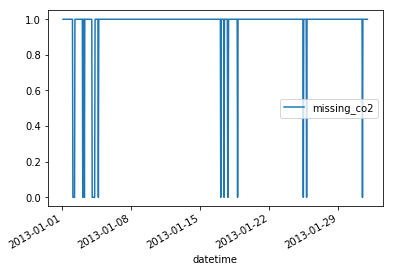

In [80]:
data[(data['year'] == 2013 )&(data['month'] == 1)&(data['station'] == 'auber')].plot(x='datetime', y='missing_co2')

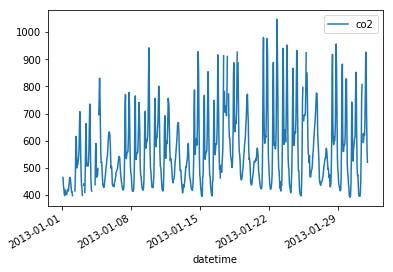

In [81]:
data[(data['year'] == 2013 )&(data['month'] == 1)&(data['station'] == 'auber')].plot(x='datetime', y='co2')

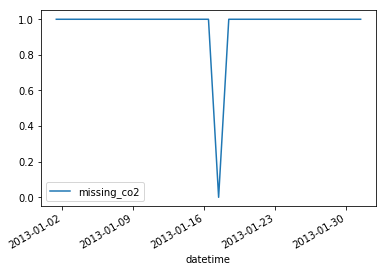

In [83]:
data[(data['year'] == 2013 )&(data['month'] == 1)&(data['station'] == 'auber')&(data['3'] == 389.0)].plot(x='datetime', y='missing_co2')

Création de a_day : nombre de valeurs manquantes sur une journée 

In [85]:
#je prends un index du tableau
i= 32
data_i = data.loc[i] 
data_i_co2 = data_i["co2"]
data_i_day = data.loc[i-12:i+12]
data_i_day_co2 = data_i_day["co2"]
data_i_day_missing_co2 = data_i_day["missing_co2"]
data_i_day_missing_co2

20    1
21    1
22    1
23    1
24    1
25    0
26    0
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    0
35    1
36    1
37    1
38    0
39    1
40    1
41    1
42    1
43    1
44    1
Name: missing_co2, dtype: int64

In [87]:
#je définis aday comme étant le nombre de valeurs non manquantes dans la fourchette index-12 /index+12 soit une journée
data_i["missing_co2_day"] = data_i_day_missing_co2.count()
data_i

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\program files\python36\lib\site-packages\pandas\core\series.py:769: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value


co2                                488
humi                              45.3
no                                  37
no2                                 35
pm10                               557
pm2.5                              191
station                          auber
temp                              18.7
date               2013-02-03 00:00:00
time                          10:00:00
precipitation                      2.5
temp_min                             2
temp_max                             5
1                                    0
11                                   0
14                                   0
3                                  389
4                                    0
7                                    0
9                                  402
a                                   95
b                                    0
year                              2013
month                                2
day                                  3
hour                     

### Interpolation

In [88]:
import scipy 
data_inter_pchip = data.interpolate(method='pchip')    

In [89]:
data_inter_pchip.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,9,a,b,year,month,day,hour,weekday,datetime,missing_co2
0,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,402.0,95.0,0.0,2013,1,1,10,1,2013-01-01 10:00:00,1
1,767.0,46.4,99.0,54.0,362.0,110.0,auber,18.3,2013-01-15,10:00:00,...,402.0,95.0,0.0,2013,1,15,10,1,2013-01-15 10:00:00,1
2,495.0,45.0,68.0,45.0,117.0,36.0,auber,18.7,2013-01-12,10:00:00,...,402.0,95.0,0.0,2013,1,12,10,5,2013-01-12 10:00:00,1
3,708.0,45.3,90.0,40.0,234.0,73.0,auber,19.5,2013-01-09,10:00:00,...,402.0,95.0,0.0,2013,1,9,10,2,2013-01-09 10:00:00,1
4,749.0,41.8,213.0,62.0,314.0,112.0,auber,17.5,2013-01-16,10:00:00,...,402.0,95.0,0.0,2013,1,16,10,2,2013-01-16 10:00:00,1


In [90]:
data_co2= data_inter_pchip[data_inter_pchip["co2"].isnull()]

In [91]:
data_co2.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,9,a,b,year,month,day,hour,weekday,datetime,missing_co2


Visualisation des données interpolées 

In [95]:
data_no= data_inter_pchip[data_inter_pchip["no"].isnull()]
data_no.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,9,a,b,year,month,day,hour,weekday,datetime,missing_co2
0,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,402.0,95.0,0.0,2013,1,1,10,1,2013-01-01 10:00:00,1


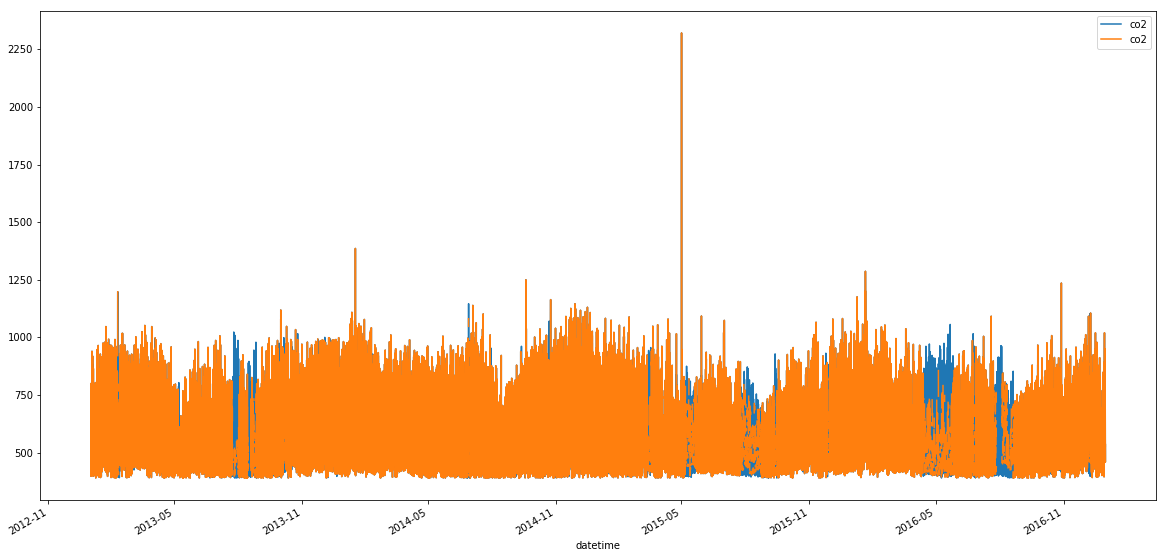

In [96]:
fig, ax = plt.subplots(figsize=(20,10))
data_inter_pchip.plot(x = "datetime",y = "co2", ax=ax)
data.plot(x="datetime",y = "co2", ax=ax)

In [97]:
data_inter_linear = data.interpolate(method='linear')

In [98]:
data_inter_quadratic =data.interpolate(method='quadratic')

In [99]:
data_inter_cubic= data.interpolate(method='cubic')

In [100]:
data_inter_values = data.interpolate(method='values')

In [101]:
#data_inter_cbarycentric= data.interpolate(method='barycentric')

In [102]:
data_inter_akima = data.interpolate(method='akima')

In [103]:
data_inter_rien = data.interpolate()

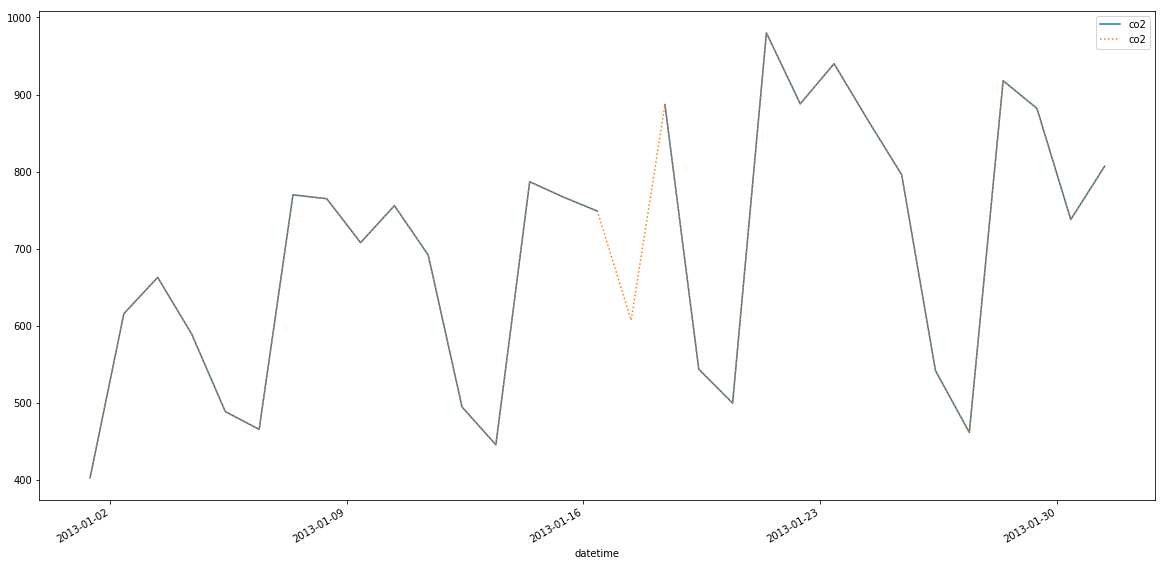

In [104]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['month'] == 1)&(data['station'] == 'auber')&(data['3'] == 389.0)].plot(x='datetime', y='co2',ax=ax)
data_inter_pchip[(data_inter_pchip['year'] == 2013 )&(data_inter_pchip['month'] == 1)&(data_inter_pchip['3'] == 389.0)&(data_inter_pchip['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')

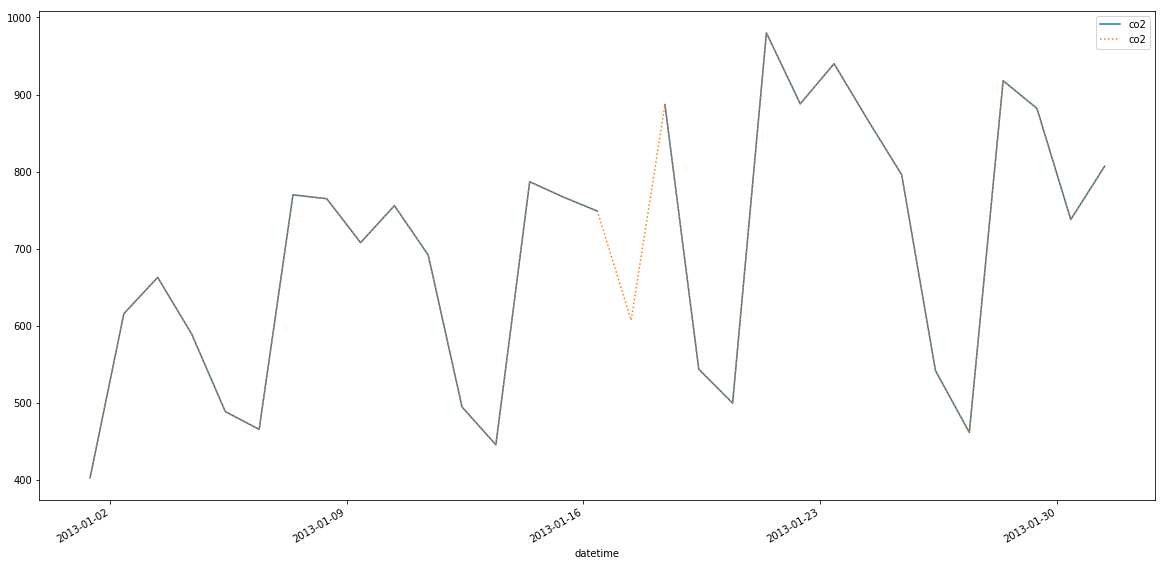

In [106]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['month'] == 1)&(data['station'] == 'auber')&(data['3'] == 389.0)].plot(x='datetime', y='co2',ax=ax)
data_inter_linear[(data_inter_linear['year'] == 2013 )&(data_inter_linear['month'] == 1)&(data_inter_linear['3'] == 389.0)&(data_inter_linear['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')

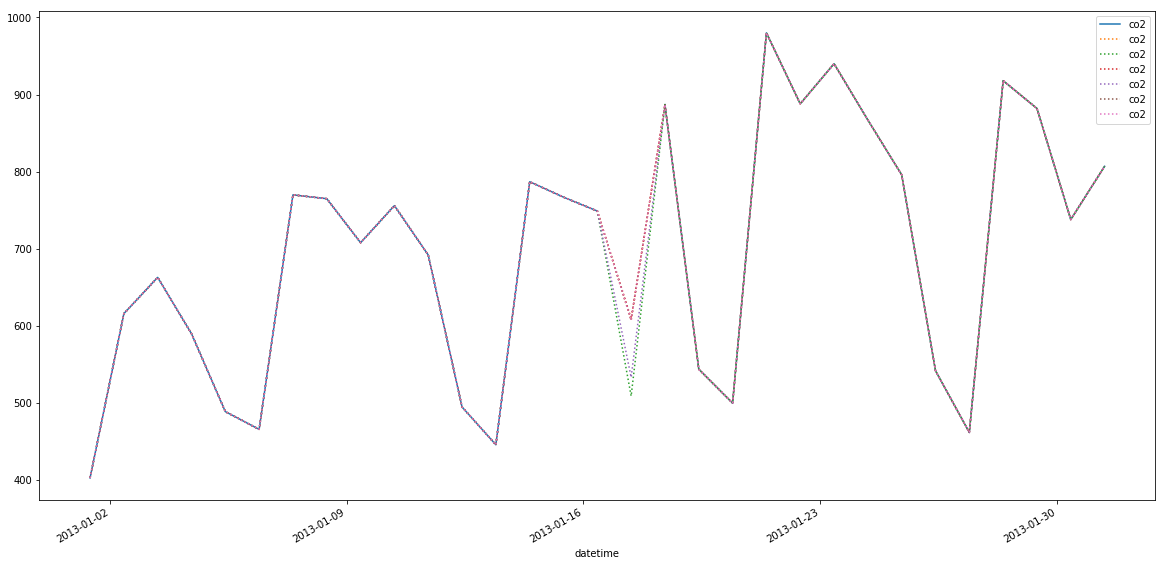

In [107]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['month'] == 1)&(data['station'] == 'auber')&(data['3'] == 389.0)].plot(x='datetime', y='co2',ax=ax)
data_inter_rien[(data_inter_rien['year'] == 2013 )&(data_inter_rien['month'] == 1)&(data_inter_rien['3'] == 389.0)&(data_inter_rien['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_cubic[(data_inter_cubic['year'] == 2013 )&(data_inter_cubic['month'] == 1)&(data_inter_cubic['3'] == 389.0)&(data_inter_cubic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_akima[(data_inter_akima['year'] == 2013 )&(data_inter_akima['month'] == 1)&(data_inter_akima['3'] == 389.0)&(data_inter_akima['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_quadratic[(data_inter_quadratic['year'] == 2013 )&(data_inter_quadratic['month'] == 1)&(data_inter_quadratic['3'] == 389.0)&(data_inter_quadratic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_linear[(data_inter_linear['year'] == 2013 )&(data_inter_linear['month'] == 1)&(data_inter_linear['3'] == 389.0)&(data_inter_linear['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_pchip[(data_inter_pchip['year'] == 2013 )&(data_inter_pchip['month'] == 1)&(data_inter_pchip['3'] == 389.0)&(data_inter_pchip['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')

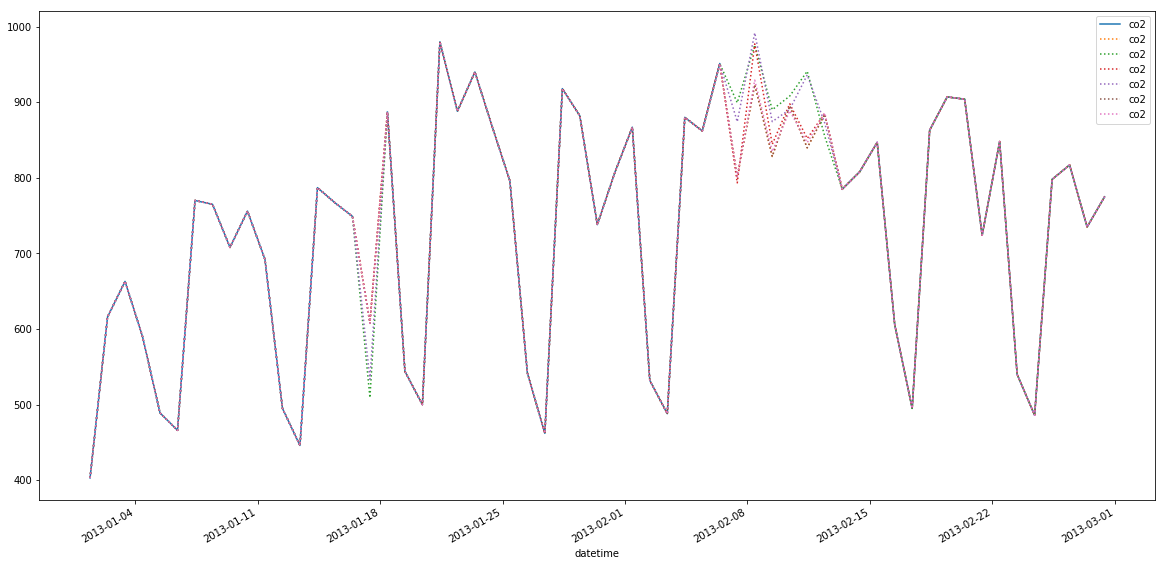

In [108]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['month'] < 3)&(data['station'] == 'auber')&(data['3'] == 389.0)].plot(x='datetime', y='co2',ax=ax)
data_inter_rien[(data_inter_rien['year'] == 2013 )&(data_inter_rien['month'] < 3)&(data_inter_rien['3'] == 389.0)&(data_inter_rien['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_cubic[(data_inter_cubic['year'] == 2013 )&(data_inter_cubic['month'] < 3)&(data_inter_cubic['3'] == 389.0)&(data_inter_cubic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_akima[(data_inter_akima['year'] == 2013 )&(data_inter_akima['month'] < 3)&(data_inter_akima['3'] == 389.0)&(data_inter_akima['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_quadratic[(data_inter_quadratic['year'] == 2013 )&(data_inter_quadratic['month'] < 3)&(data_inter_quadratic['3'] == 389.0)&(data_inter_quadratic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_linear[(data_inter_linear['year'] == 2013 )&(data_inter_linear['month'] < 3)&(data_inter_linear['3'] == 389.0)&(data_inter_linear['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_pchip[(data_inter_pchip['year'] == 2013 )&(data_inter_pchip['month'] < 3)&(data_inter_pchip['3'] == 389.0)&(data_inter_pchip['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')

L'interpolation ne fait pas apparaitre le motif régulier

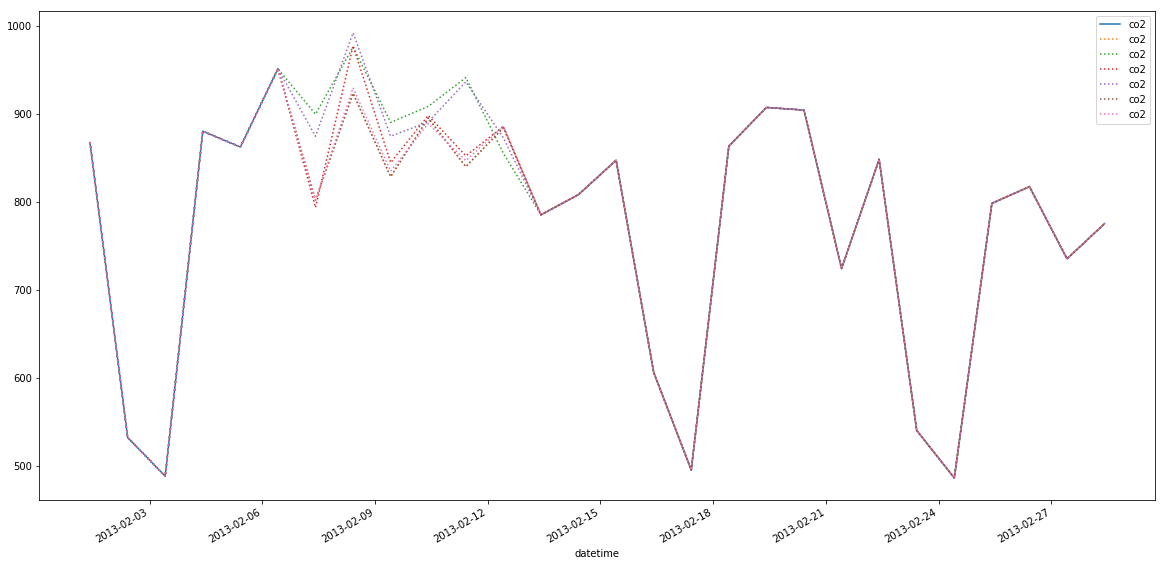

In [109]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['month'] ==2 )&(data['station'] == 'auber')&(data['3'] == 389.0)].plot(x='datetime', y='co2',ax=ax)
data_inter_rien[(data_inter_rien['year'] == 2013 )&(data_inter_rien['month'] ==2)&(data_inter_rien['3'] == 389.0)&(data_inter_rien['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_cubic[(data_inter_cubic['year'] == 2013 )&(data_inter_cubic['month'] ==2)&(data_inter_cubic['3'] == 389.0)&(data_inter_cubic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_akima[(data_inter_akima['year'] == 2013 )&(data_inter_akima['month'] ==2)&(data_inter_akima['3'] == 389.0)&(data_inter_akima['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_quadratic[(data_inter_quadratic['year'] == 2013 )&(data_inter_quadratic['month'] ==2)&(data_inter_quadratic['3'] == 389.0)&(data_inter_quadratic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_linear[(data_inter_linear['year'] == 2013 )&(data_inter_linear['month']==2)&(data_inter_linear['3'] == 389.0)&(data_inter_linear['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_pchip[(data_inter_pchip['year'] == 2013 )&(data_inter_pchip['month'] ==2)&(data_inter_pchip['3'] == 389.0)&(data_inter_pchip['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')

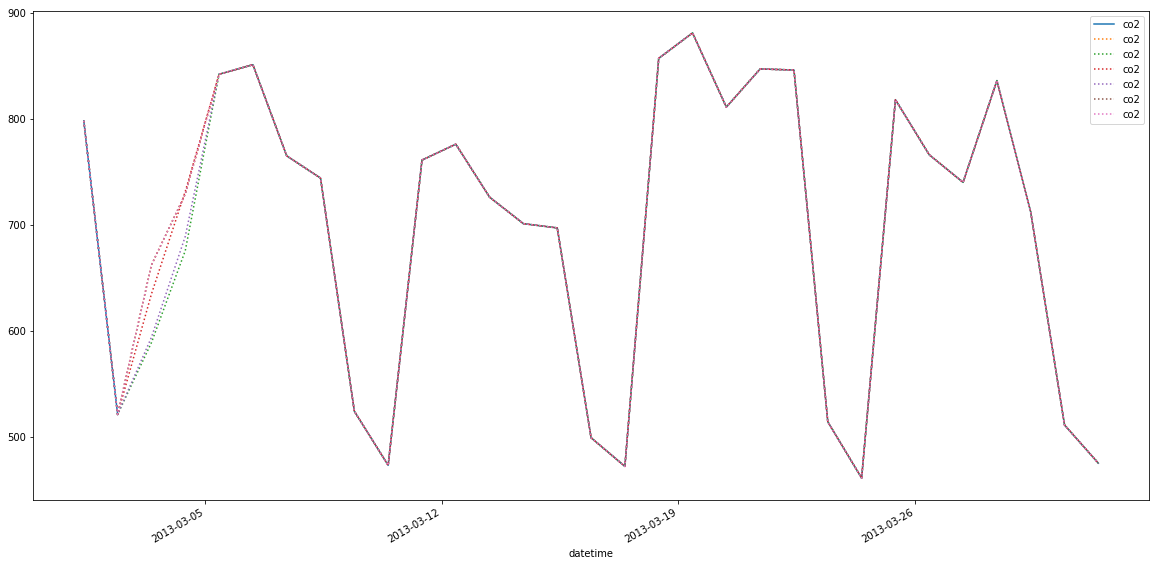

In [110]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['month'] ==3 )&(data['station'] == 'auber')&(data['3'] == 389.0)].plot(x='datetime', y='co2',ax=ax)
data_inter_rien[(data_inter_rien['year'] == 2013 )&(data_inter_rien['month'] ==3)&(data_inter_rien['3'] == 389.0)&(data_inter_rien['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_cubic[(data_inter_cubic['year'] == 2013 )&(data_inter_cubic['month'] ==3)&(data_inter_cubic['3'] == 389.0)&(data_inter_cubic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_akima[(data_inter_akima['year'] == 2013 )&(data_inter_akima['month'] ==3)&(data_inter_akima['3'] == 389.0)&(data_inter_akima['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_quadratic[(data_inter_quadratic['year'] == 2013 )&(data_inter_quadratic['month'] ==3)&(data_inter_quadratic['3'] == 389.0)&(data_inter_quadratic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_linear[(data_inter_linear['year'] == 2013 )&(data_inter_linear['month']==3)&(data_inter_linear['3'] == 389.0)&(data_inter_linear['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_pchip[(data_inter_pchip['year'] == 2013 )&(data_inter_pchip['month'] ==3)&(data_inter_pchip['3'] == 389.0)&(data_inter_pchip['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['month'] == 1)&(data['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax)
data_inter_rien[(data_inter_rien['year'] == 2013 )&(data_inter_rien['month'] == 1)&(data_inter_rien['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_cubic[(data_inter_cubic['year'] == 2013 )&(data_inter_cubic['month'] == 1)&(data_inter_cubic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_akima[(data_inter_akima['year'] == 2013 )&(data_inter_akima['month'] == 1)&(data_inter_akima['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_quadratic[(data_inter_quadratic['year'] == 2013 )&(data_inter_quadratic['month'] == 1)&(data_inter_quadratic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_linear[(data_inter_linear['year'] == 2013 )&(data_inter_linear['month'] == 1)&(data_inter_linear['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_pchip[(data_inter_pchip['year'] == 2013 )&(data_inter_pchip['month'] == 1)&(data_inter_pchip['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')

### Evolution des données par an 

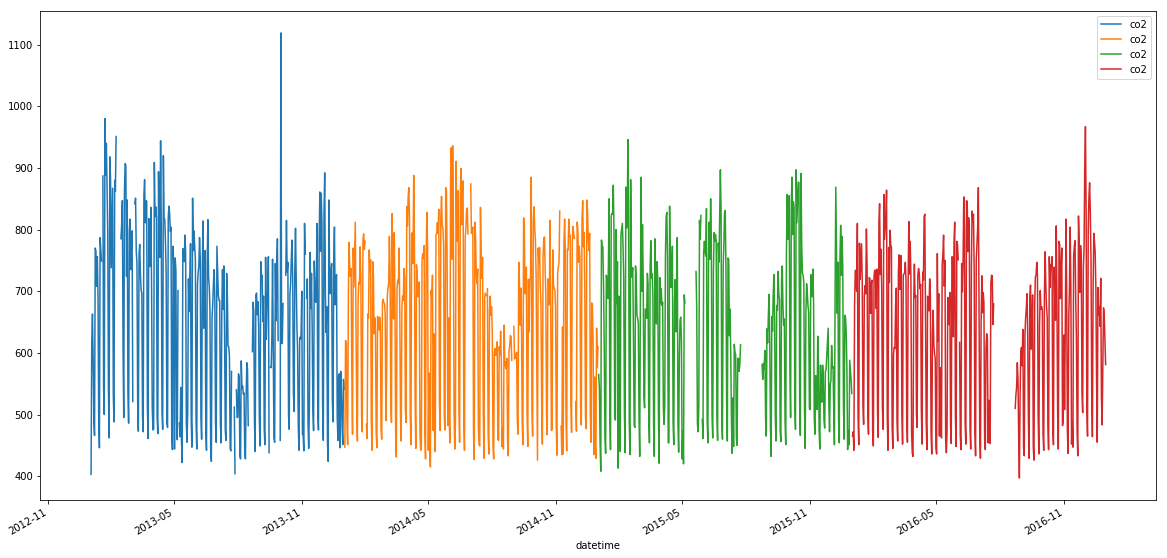

In [113]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['station'] == 'auber')&(data['3'] == 389.0)].plot(x='datetime', y='co2',ax=ax)
data[(data['year'] == 2014 )&(data['station'] == 'auber')&(data['3'] == 389.0)].plot(x='datetime', y='co2',ax=ax)
data[(data['year'] == 2015 )&(data['station'] == 'auber')&(data['3'] == 389.0)].plot(x='datetime', y='co2',ax=ax)
data[(data['year'] == 2016 )&(data['station'] == 'auber')&(data['3'] == 389.0)].plot(x='datetime', y='co2',ax=ax)

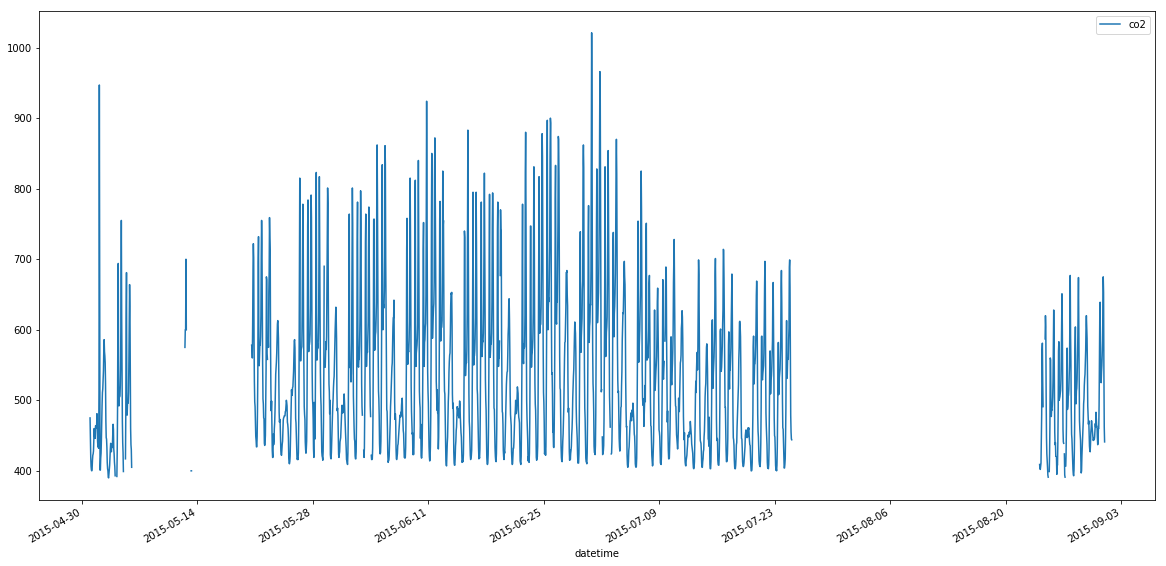

In [119]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2015 )&(data['month']>4)&(data['month'] <9)&(data['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax)

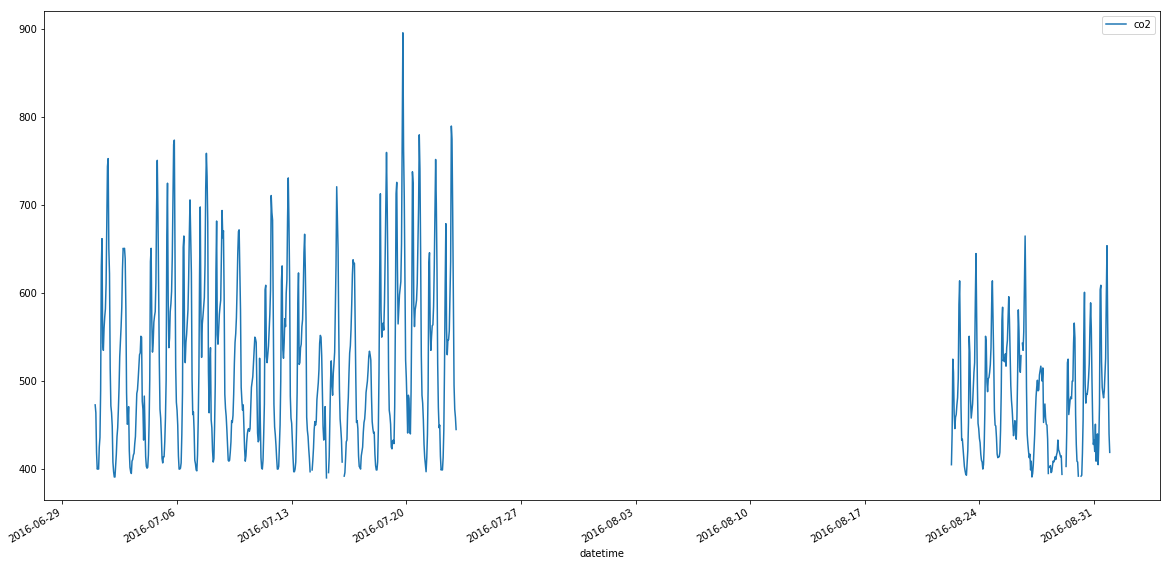

In [121]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2016 )&(data['month']>6)&(data['month'] <9)&(data['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax)

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

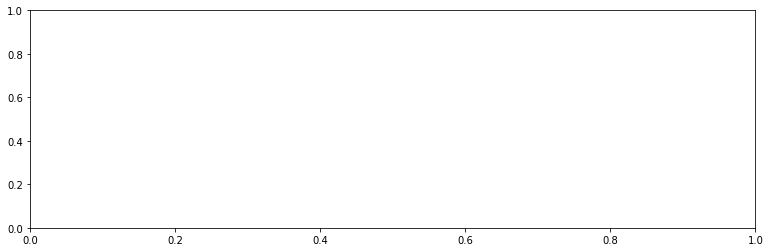

In [129]:
fig, ax = plt.subplots(figsize=(13,4))
sns.distplot((data[data['year'] == 2013]& data[data['station'] == 'auber'])['month'], ax = ax, kde = False, color='blue')
#sns.distplot(data[data['year'] == 2013]['month'], ax = ax, kde = False, color='red')
#sns.distplot(missing_data[missing_data['station'] == 'franklin']['month'], ax = ax, kde = False, color='green')